In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\ranab\\Downloads\\train.csv")

In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
X=df.loc[:,['ram','px_width','px_height','battery_power','sc_w','price_range']].describe()   #Statistical model of our dataset.
X.style.background_gradient(cmap = "YlGn")

,ram,px_width,px_height,battery_power,sc_w,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2124.213000,1251.515500,645.108000,1238.518500,5.767000,1.500000
std,1084.732044,432.199447,443.780811,439.418206,4.356398,1.118314
min,256.000000,500.000000,0.000000,501.000000,0.000000,0.000000
25%,1207.500000,874.750000,282.750000,851.750000,2.000000,0.750000
50%,2146.500000,1247.000000,564.000000,1226.000000,5.000000,1.500000
75%,3064.500000,1633.000000,947.250000,1615.250000,9.000000,2.250000
max,3998.000000,1998.000000,1960.000000,1998.000000,18.000000,3.000000


In [6]:
df.shape

(2000, 21)

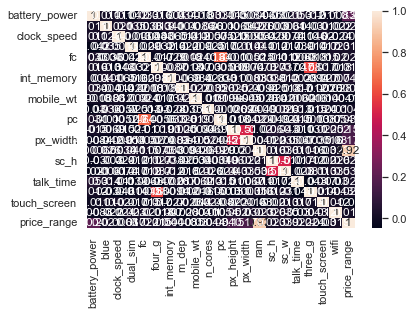

In [7]:
plt.figure()
cor = df.corr()
sns.set(rc={'figure.figsize':(25,18)})
sns.heatmap(cor,annot=True)
plt.show()

In [8]:
X = df.loc[:,['ram','px_width','px_height','battery_power','sc_w']]
Y = df.loc[:,'price_range']

In [9]:
X.head()

,ram,px_width,px_height,battery_power,sc_w
0,2549,756,20,842,7
1,2631,1988,905,1021,3
2,2603,1716,1263,563,2
3,2769,1786,1216,615,8
4,1411,1212,1208,1821,2


In [10]:
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 235)

In [12]:
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.952
test accuracy: 0.968


In [13]:
y_pred = svm.predict(X_test)

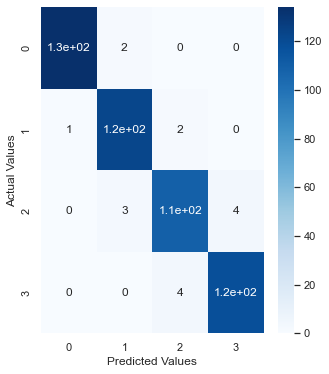

In [14]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test, y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

In [22]:
zero=data[data.price_range==0]
one=data[data.price_range==1]
two=data[data.price_range==2]
three=data[data.price_range==3]

trace0 = go.Box(
    y=zero.ram.values,
    x=zero.three_g.values,
    name='0',
    marker=dict(
        color='#3D9970'
    )
)
trace1 = go.Box(
    y=one.ram.values,
    x=one.three_g.values,
    name='1',
    marker=dict(
        color='#FF4136'
    )
)
trace2 = go.Box(
    y=two.ram.values,
    x=two.three_g.values,
    name='2',
    marker=dict(color='#FF851B'
    )
)
trace3 = go.Box(
    y=three.ram.values,
    x=three.three_g.values,
    name='3',
    marker=dict(
        color='blue'
    )
)

data1 = [trace0, trace1, trace2,trace3]
layout = go.Layout(
    xaxis=dict(title="Three-g"),
    yaxis=dict(
        title="ram",
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data1, layout=layout)
iplot(fig)

ValueError: Image size of 236304x216 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 236304x216 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 236304x216 with 1094 Axes>

In [24]:
sns.boxplot(X)

C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 360x432 with 0 Axes>

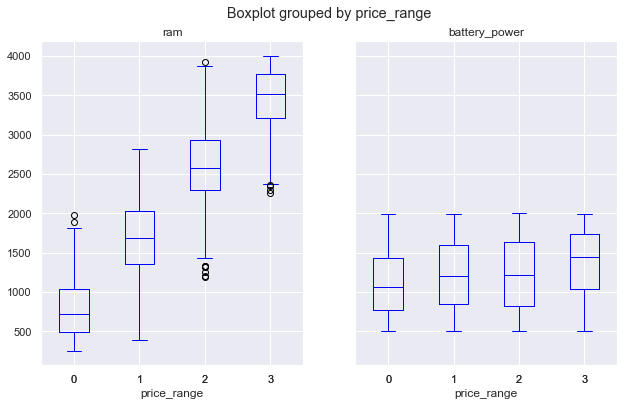

<Figure size 360x432 with 0 Axes>

In [33]:
boxplot = df.boxplot(column=['ram', 'battery_power'], by='price_range',
                  return_type=None,grid=True,figsize=(10,6),color='blue')
plt.figure(figsize=(5,6)) 